# Shopify Data Science Intern Challenge

### Investigating sneaker sales data using pandas

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv("Shopify_DS_Intern_Challenge_Data_Set.csv")

In [26]:
df.nunique()

order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4991
dtype: int64

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,5000.0,2500.5000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
shop_id,5000.0,50.0788,29.006118,1.0,24.00,50.0,75.00,100.0
user_id,5000.0,849.0924,87.798982,607.0,775.00,849.0,925.00,999.0
order_amount,5000.0,3145.1280,41282.539349,90.0,163.00,284.0,390.00,704000.0
total_items,5000.0,8.7872,116.320320,1.0,1.00,2.0,3.00,2000.0


<AxesSubplot:title={'center':'Total Items Per Order log scale'}, xlabel='total_items', ylabel='Count'>

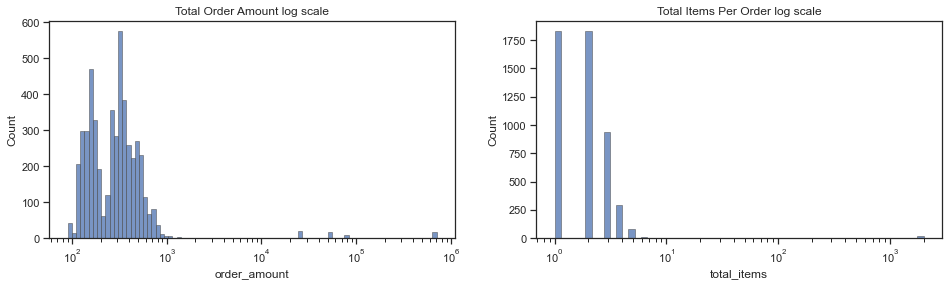

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.set_title("Total Order Amount log scale")
ax2.set_title("Total Items Per Order log scale")
sns.histplot(data=df, x="order_amount", palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5, ax=ax1)
sns.histplot(data=df, x="total_items", palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5, ax=ax2)

## Question 1 A)
As visualised above, in the Total Order Amount Log Scale Graph, due to a few outliers the data is clearly skewed to the right.
This could be the cause of the such a high Average Order Value, a possible alternative could be to use the median order value of 284.00 dollars.
Another solution could be to remove the outliers from the data set and recalculate the mean, this would year an average order value of 302.58 dollars.

In [103]:
reducedData = df[df["order_amount"]<10000]
reducedData.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,4937.0,2499.551347,1444.069407,1.0,1248.0,2497.0,3751.0,5000.0
shop_id,4937.0,49.846465,29.061131,1.0,24.0,50.0,74.0,100.0
user_id,4937.0,849.752279,86.840313,700.0,775.0,850.0,925.0,999.0
order_amount,4937.0,302.580514,160.804912,90.0,163.0,284.0,387.0,1760.0
total_items,4937.0,1.994734,0.982821,1.0,1.0,2.0,3.0,8.0


<AxesSubplot:title={'center':'Total Items Per Order log scale'}, xlabel='total_items', ylabel='Count'>

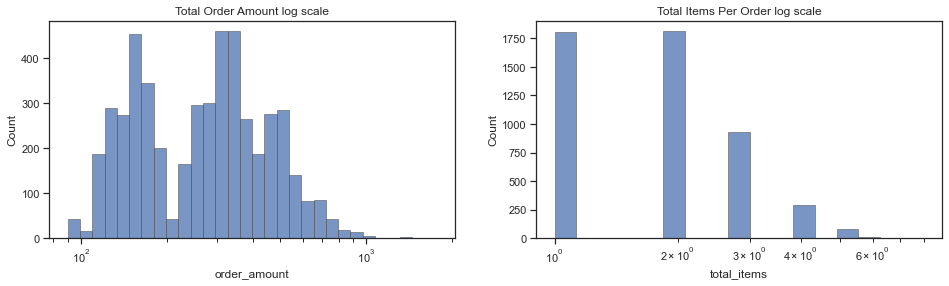

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.set_title("Total Order Amount log scale")
ax2.set_title("Total Items Per Order log scale")
sns.histplot(data=reducedData, x="order_amount", palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5, ax=ax1)
sns.histplot(data=reducedData, x="total_items", palette="light:m_r", log_scale=True, edgecolor=".3", linewidth=.5, ax=ax2)

## Question 1 B)
An alternative metric for this data set could be to calculate the mean revenue per shop.

In [122]:
df.groupby("shop_id").sum()

,order_id,user_id,order_amount,total_items
shop_id,,,,
1,110641,36679,13588,86
2,126448,47370,9588,102
3,110682,40690,14652,99
4,140128,44189,13184,103
5,112423,38800,13064,92
...,...,...,...,...
96,127305,44136,16830,110
97,120413,40542,15552,96
98,143310,50274,14231,107


In [137]:
df.groupby("shop_id").sum().describe()["order_amount"]

count    1.000000e+02
mean     1.572564e+05
std      1.216218e+06
min      6.840000e+03
25%      1.293050e+04
50%      1.488750e+04
75%      1.760000e+04
max      1.199018e+07
Name: order_amount, dtype: float64

In [139]:
df.groupby("shop_id").sum()["order_amount"].mean()

157256.4

## Question 1 C)
The mean order amount per shop is 157256.40 dollars.

# Question 2: Navigating Shipping Database using SQL Queries

A) How many orders were shipped by Speedy Express in total?

    Answer: 68;
    SQL Query: SELECT COUNT(ShipperID) FROM [Orders] WHERE ShipperID = 3;
    
B) What is the last name of the employee with the most orders?

    Answer: Peacock;
    SQL Query: SELECT Employees.EmployeeID, Employees.LastName, COUNT(Orders.OrderID), Orders.EmployeeID FROM Orders
                LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
                GROUP BY(Orders.EmployeeID) ORDER BY COUNT(Orders.OrderID);
                
B) What is the last name of the employee with the most orders?

    Answer: Gorgonzola Telino
    SQL Query: FROM Customers
                LEFT JOIN Orders ON Orders.CustomerID = Customers.CustomerID
                LEFT JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID
                LEFT JOIN Products ON Products.ProductID = OrderDetails.ProductID
                WHERE Country = "Germany"
                GROUP BY OrderDetails.ProductID ORDER BY COUNT(Orders.OrderID);
